In [1]:
# Загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Загужаем небходимые таблицы
df_a = pd.read_csv('C:/Users/Test/Documents/DS/docs/data_analyst/module_7/assessments.csv')
df_c = pd.read_csv('C:/Users/Test/Documents/DS/docs/data_analyst/module_7/courses.csv')
df_sa = pd.read_csv('C:/Users/Test/Documents/DS/docs/data_analyst/module_7/studentAssessment.csv')
df_sr = pd.read_csv('C:/Users/Test/Documents/DS/docs/data_analyst/module_7/studentRegistration.csv')

In [3]:
# 1. Сколько студентов успешно сдали только один курс?

# Склеим таблицы чтобы выявить какой из id_assessment является экзаменом - Exam
df_task_1 = df_sa.merge(df_a, how = 'inner', on = 'id_assessment')
# Группируем полученные данные через фильтр. Какой студент сколько сдал успешных экзаменов
df_task_1 = df_task_1[(df_task_1.assessment_type=='Exam')&(df_task_1.score>=40)]  \
    .groupby('id_student', as_index = False)  \
    .agg({'id_assessment' : 'count'})
# Фильтуем количество успешных экзаменов = 1. Вычисляем и печатаем результат
print('Количество студентов, успешно сдавших только 1 курс (экзамен по курсу):',  \
      df_task_1[df_task_1.id_assessment == 1].shape[0])

Количество студентов, успешно сдавших только 1 курс (экзамен по курсу): 3802


In [4]:
# 2. Выяви самый сложный и самый простой экзамен.

# Соберём таблицу, в которой есть номер теста / экзамена, очки, курсы
df_task_2 = df_sa.merge(df_a, how = 'inner', on = 'id_assessment')
# Убрал лишние колонки
df_task_2 = df_task_2[['id_assessment', 'score', 'code_module', 'id_student', 'assessment_type']]
# Выбрал только экзамены
df_task_2 = df_task_2[df_task_2.assessment_type == 'Exam']
# Добавил отетку об успешности
df_task_2['success'] = np.where(df_task_2.score>=40, 1, 0)

# Разбивка по экзаменам
# Группируем по экзамену / количество успешных сдач
df_task_2_success = df_task_2.groupby('id_assessment', as_index = False).agg({'success' : 'sum'})  \
    .rename(columns = {'success' : 'success_attempts'})
# Группируем по экзамену / количество попыток
df_task_2_attempts = df_task_2.groupby('id_assessment', as_index = False).agg({'success' : 'count'})  \
    .rename(columns = {'success' : 'total_attempts'})
# Объединим 2 таблицы для того, чтобы увидеть оба паказателя
df_task_2_exams = df_task_2_success.merge(df_task_2_attempts, how = 'inner', on = 'id_assessment')
# Добавил колонку с завершаемостью
df_task_2_exams = df_task_2_exams.assign(comleted = df_task_2_exams.success_attempts / df_task_2_exams.total_attempts)
# Вывод на печать результатов
print('*Разбивка по экзаменам*')
print('Самый простой экзамен (завершаемость самая большая):  ',  \
      df_task_2_exams.sort_values('comleted', ascending = False).head(1)['id_assessment'].tolist()[0])
print('Самый сложный экзамен (завершаемость самая маленькая):',  \
      df_task_2_exams.sort_values('comleted').head(1)['id_assessment'].tolist()[0])

# Разбивка по курсам
# Группируем по курсу / количество успешных сдач
df_task_2_success_module = df_task_2.groupby('code_module', as_index = False).agg({'success' : 'sum'})  \
    .rename(columns = {'success' : 'success_attempts'})
# Группируем по курсу / количество попыток
df_task_2_attempts_module = df_task_2.groupby('code_module', as_index = False).agg({'success' : 'count'})  \
    .rename(columns = {'success' : 'total_attempts'})
# Объединим 2 таблицы для того, чтобы увидеть оба паказателя
df_task_2_modules = df_task_2_success_module.merge(df_task_2_attempts_module, how = 'inner', on = 'code_module')
# Добавил колонку с завершаемостью
df_task_2_modules = df_task_2_modules.assign(comleted =  \
                                             df_task_2_modules.success_attempts / df_task_2_modules.total_attempts)
# Вывод на печать результатов
print('*Разбивка по курсам*')
print('Самый простой курс (завершаемость самая большая):  ',  \
      df_task_2_modules.sort_values('comleted', ascending = False).head(1)['code_module'].tolist()[0])
print('Самый сложный курс (завершаемость самая маленькая):',  \
      df_task_2_modules.sort_values('comleted').head(1)['code_module'].tolist()[0])

*Разбивка по экзаменам*
Самый простой экзамен (завершаемость самая большая):   25361
Самый сложный экзамен (завершаемость самая маленькая): 25340
*Разбивка по курсам*
Самый простой курс (завершаемость самая большая):   DDD
Самый сложный курс (завершаемость самая маленькая): CCC


In [5]:
# 3. По каждому предмету определи средний срок сдачи экзаменов.

# Объединим 2 таблицы, чтобы увидеть курсы с продолжительностью их сдачи студентами и увидеть тип теста
df_task_3 = df_sa.merge(df_a, how = 'inner', on = 'id_assessment')
# Оставляем только экзамены успшные (score>=40)
df_task_3 = df_task_3[(df_task_3.assessment_type=='Exam')&(df_task_3.score>=40)]
# Группируем по курсу (code_module) и date_submitted - найти средний срок
df_task_3_modules = df_task_3.groupby('code_module').agg({'date_submitted' : 'mean'})  \
    .rename(columns = {'date_submitted' : 'avg_term'})
# Выводим на печать результирующую таблицу
print('Информация по среднему сроку сдачи экзаменов приведена в таблице ниже:')
df_task_3_modules

Информация по среднему сроку сдачи экзаменов приведена в таблице ниже:


,avg_term
code_module,
CCC,239.345217
DDD,237.976006


In [6]:
# 4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3).

# ТОП-3 самых популярных
# Группировка по курсу / количеству регистрации. Сортировка и вывод данных
top_3_popular = df_sr.groupby('code_module')  \
    .agg({'date_registration' : 'count'})  \
    .rename(columns = {'date_registration' : 'quantity_of_registration'})  \
    .sort_values('quantity_of_registration', ascending = False)  \
    .head(3)
print('ТОП-3 популярных:', top_3_popular, sep = '\n')

# ТОП-3 с большим оттоком
# Убрал строки с пропусками
df_unregistration = df_sr.dropna()
# Группировка по курсу / количеству отмен регистрации. Сортировка и вывод данных
top_3_unregistration = df_unregistration.groupby('code_module')  \
    .agg({'date_unregistration' : 'count'})  \
    .rename(columns = {'date_unregistration' : 'quantity_of_unregistration'})  \
    .sort_values('quantity_of_unregistration', ascending = False)  \
    .head(3)
print('*'*40)
print('ТОП-3 по оттоку:', top_3_unregistration, sep = '\n')

ТОП-3 популярных:
             quantity_of_registration
code_module                          
BBB                              7900
FFF                              7751
DDD                              6257
****************************************
ТОП-3 по оттоку:
             quantity_of_unregistration
code_module                            
FFF                                2370
BBB                                2369
DDD                                2223


In [7]:
# 5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми 
# долгими средними сроками сдачи курсов.

# Cеместр с самой низкой завершаемостью курсов

# Соединим 2 таблицы чтобы видеть все необходимые данные
df_task_5 = df_sa.merge(df_a, how = 'inner', on = 'id_assessment')
# Оставил только экзамены
df_task_5 = df_task_5[df_task_5.assessment_type=='Exam']
# Добавил столбец с информацией по успешности экзамена
df_task_5 = df_task_5.assign(success = np.where(df_task_5.score>=40, 1, 0))
# Группирую по семестру / количество успешных экзаменов
df_code_presentation_success = df_task_5.groupby('code_presentation', as_index = False)  \
    .agg({'success' : 'sum'})  \
    .rename(columns = {'success' : 'success_attempts'})
# Группирую по семестру / количество экзаменов
df_code_presentation_attempts = df_task_5.groupby('code_presentation', as_index = False)  \
    .agg({'success' : 'count'})  \
    .rename(columns = {'success' : 'total_attempts'})
# Объединим 2 таблицы для того, чтобы увидеть оба паказателя
df_task_5_completed = df_code_presentation_success.merge(df_code_presentation_attempts, how = 'inner', on = 'code_presentation')
# Добавил колонку с завершаемостью
df_task_5_completed = df_task_5_completed.assign(comleted =  \
                                             df_task_5_completed.success_attempts / df_task_5_completed.total_attempts)
# Вывод на печать результата
print('Cеместр с самой низкой завершаемостью курсов:',  \
     df_task_5_completed.sort_values('comleted').head(1)['code_presentation'].tolist()[0])

# Cеместр с самыми долгими средними сроками сдачи курсов

# Соединим 2 таблицы чтобы видеть все необходимые данные
df_task_5_new = df_sa.merge(df_a, how = 'inner', on = 'id_assessment')
# Отобрал только экзамены (курсы) + сданные курсы = успешные = "score>=40"
df_task_5_new = df_task_5_new[(df_task_5_new.assessment_type=='Exam')&(df_task_5_new.score>=40)]
# Группировка по семестру / среднему сроку ответа на курс (экзамен)
df_code_presentation_mean_day = df_task_5_new.groupby('code_presentation', as_index = False)  \
    .agg({'date_submitted' : 'mean'})  \
    .rename(columns = {'date_submitted' : 'avg_days'})
# Вывод ответа на печать
print('Cеместр с самыми долгими средними сроками сдачи курсов:',  \
      df_code_presentation_mean_day  \
      .sort_values('avg_days', ascending = False)  \
      .head(1)['code_presentation'].tolist()[0])

Cеместр с самой низкой завершаемостью курсов: 2013B
Cеместр с самыми долгими средними сроками сдачи курсов: 2014J


In [ ]:
# 6. RFM статус для каждого студента

In [8]:
# Во-первых оставим только записи с экзаменами, так как все критерии на них завязаны
# Соединим 2 таблицы чтобы видеть все необходимые данные
df_task_6 = df_sa.merge(df_a, how = 'inner', on = 'id_assessment')
# Оставил только экзамены
df_task_6 = df_task_6[df_task_6.assessment_type=='Exam']
df_task_6.head(3)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0


In [9]:
# Создание кластера M - среднее количество баллов, получаемое за экзамен.
# Количество строк в таблице = 4959, при это количество студентов (df_task_6.id_student.nunique()) = 4633.
# Группируем дф по студенту / медиане его баллов по разным экзаменам
student_score = df_task_6.groupby('id_student', as_index=False).agg({'score':'median'})
# Создаём новую колонку с разделением по шкале от 1 до 5
# Разбил на 5 групп. 0-20 / 21-40 / 41-60 / 61-80 / 80-100
student_score = student_score.assign(M = pd.cut(student_score.score, 5,  \
                                                labels = [1, 2, 3, 4, 5]))
# Убрал лишнюю колонку чтобы не мешала при джоине
student_score = student_score.drop(columns = 'score')
# Приклеил показатель М к основной таблице
df_task_6 = df_task_6.merge(student_score, how = 'inner', on = 'id_student')
df_task_6.head(3)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,M
0,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0,2
1,25340,558914,230,0,36.0,DDD,2013B,Exam,240.0,100.0,2
2,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0,4


In [10]:
# Создание кластера R - среднее время сдачи одного экзамена
# Тут не будем делить на успешную и неуспешную сдачу экзамена. Просто возъмём медиану по сроку для каждого студента.
# группировка студент / медана срока
student_term = df_task_6.groupby('id_student', as_index=False).agg({'date_submitted':'median'})
# Создаём новую колонку с разделением по шкале от 1 до 5
# Разбил на 5 групп. ВНИМАНИЕ! Чем меньше срок, тем выше балл!
student_term = student_term.assign(R = pd.cut(student_term.date_submitted, 5,  \
                                                labels = [5, 4, 3, 2, 1]))
# Убрал лишнюю колонку чтобы не мешала при джоине
student_term = student_term.drop(columns = 'date_submitted')
# Приклеил показатель М к основной таблице
df_task_6 = df_task_6.merge(student_term, how = 'inner', on = 'id_student')
df_task_6.head(3)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,M,R
0,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0,2,5
1,25340,558914,230,0,36.0,DDD,2013B,Exam,240.0,100.0,2,5
2,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0,4,5


In [11]:
# Создание кластера F - завершаемость курсов
# Создание новой колонки с завершаемостью курсов (кол-во успешных экзаменов / кол-во всех попыток сдать экзамен) Отметка >= 40.
df_task_6 = df_task_6.assign(completed = np.where(df_task_6.score>=40, 1, 0))
# Группировка по количеству попыток экзамена
student_attemts = df_task_6.groupby('id_student', as_index = False).agg({'score' : 'count'})
# То-есть у кого-то всего по 1 или 2 экзамена (student_attemts.score.unique())
# Группировка по количеству сданных экзаменов
student_completed = df_task_6.groupby('id_student', as_index = False).agg({'completed' : 'sum'})
# Всего 3 возможных варианта - 0,1,2 (student_completed.completed.unique())
# Склеиваем 2 таблицы с общей суммой попыток и суммой успешности
student_completed = student_completed.merge(student_attemts, how = 'inner', on = 'id_student')
# Создаём новую колонку с "завершаемостью курсов"
student_completed = student_completed.assign(completness = student_completed.completed / student_completed.score)
# Итого варианты "завершаемости курсов: [1. , 0. , 0.5]. (student_completed.completness.unique())
# Делить на 5 групп нет возможности. Будем делить на 3 группы. Соответственно 0 это 1 балл, 0.5 - 2, 1 - 3 балла.
# Создадим новую колонку с разбивкой на группы
student_completed = student_completed.assign(F = np.where(student_completed.completness == 0, 1,  \
                                                    np.where(student_completed.completness == 0.5, 2, 3)))
# Удалим лишние колонки перед склейкой
student_completed = student_completed.drop(columns = ['completed', 'score', 'completness'])
# Приклеил показатель R к основной таблице
df_task_6 = df_task_6.merge(student_completed, how = 'inner', on = 'id_student')
df_task_6.head(3)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,M,R,completed,F
0,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0,2,5,0,1
1,25340,558914,230,0,36.0,DDD,2013B,Exam,240.0,100.0,2,5,0,1
2,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0,4,5,1,3


In [12]:
# Удалим лишние колонки из общей таблицы
df_task_6 = df_task_6[['id_student', 'R', 'F', 'M']]
# Итого 4959 строк

In [13]:
# Теперь должны были появиться дубликаты. Удалим дубликаты
df_task_6 = df_task_6.drop_duplicates()
# Итого 4633 строк

In [14]:
# Поменяли тип данных для возможности их использования
df_task_6 = df_task_6.astype({'R': 'int32', 'M': 'int32'})

In [15]:
# Создаём новую колонку с показателем RFM
df_task_6 = df_task_6.assign(RFM_Score = df_task_6.R.map(str) + df_task_6.F.map(str) + df_task_6.M.map(str))
# По сути само это значение нам не поможет

In [16]:
# Создаём новую колонку с суммой по показателю RFM. От неё будем отталкиваться в выводах
df_task_6 = df_task_6.assign(RFM_Score_summ = df_task_6.R + df_task_6.F + df_task_6.M)
df_task_6.head(3)

,id_student,R,F,M,RFM_Score,RFM_Score_summ
0,558914,5,1,2,512,8
2,559706,5,3,4,534,12
4,559770,5,3,3,533,11


In [17]:
# По факту значение в колонке RFM_Score_summ показывает своеобразный рейтинг успешности студента в обучении.
# R - среднее время сдачи одного экзамена
# F - завершаемость курсов
# M - среднее количество баллов, получаемое за экзамен

In [18]:
# Итого для колонки RFM_Score_summ имеется 8 разных фактических значения.
# Минимальное количество возможных баллов - 3. Это означает критичную ситуацию с обученим. Таких вариантов нет.
# Максимальное количество возможных баллов - 13. Это означает наилучшую ситуацию с обученим. Таких вариантов 528.
df_task_6.RFM_Score_summ.value_counts()

12    1380
11    1372
10     756
13     528
7      291
8      223
9       56
6       27
Name: RFM_Score_summ, dtype: int64

In [19]:
# Подавляющее большинство студентов имеют от 10 до 13 баллов. Сделаем их них группу "no_problem"
# Часть студентов имеют от 6 до 9 баллов. Сделаем их них группу "problem"
# Для категории "problem" необходимо провести более глубокий анализ, чтобы они продолжали обучение у нас далее (не потерять их)
df_task_6 = df_task_6.assign(problem = np.where(df_task_6.RFM_Score_summ>9, "no_problem", "problem"))
df_task_6.problem.value_counts(normalize=True)
# Итого около 13% студентов с проблемами в успешности обучения

no_problem    0.871142
problem       0.128858
Name: problem, dtype: float64

In [20]:
# Посмотрим подробнее на студентов с проблемами
df_problem = df_task_6.query("problem=='problem'")
# Таких около 600 человек

C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,id_student,R,F,M,RFM_Score,RFM_Score_summ,problem
839,555008,2,3,3,233,8,problem
1008,586668,3,1,2,312,6,problem
1572,679569,3,1,2,312,6,problem
1754,1461795,3,3,3,333,9,problem
2223,555498,1,3,3,133,7,problem
4349,2341830,1,3,3,133,7,problem


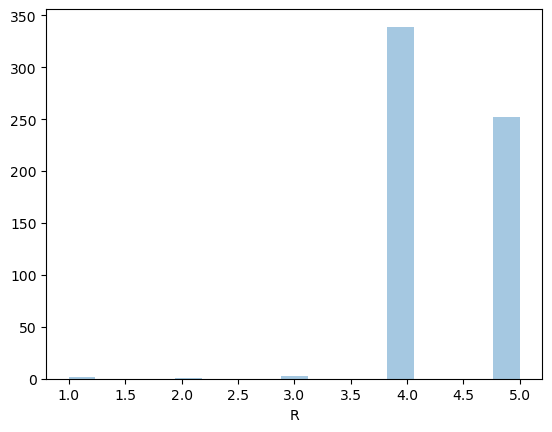

In [21]:
# Вот у этих студентов среднее время сдачи экзаменов больше, чем у других.
sns.distplot(df_problem.R, kde=False)
df_problem_R = df_problem.query("R<=3")
df_problem_R

C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,id_student,R,F,M,RFM_Score,RFM_Score_summ,problem
0,558914,5,1,2,512,8,problem
60,576516,5,1,2,512,8,problem
65,577245,4,1,2,412,7,problem
69,577686,5,1,2,512,8,problem
81,582087,5,1,2,512,8,problem
...,...,...,...,...,...,...,...
4937,651061,4,1,2,412,7,problem
4945,651672,4,1,2,412,7,problem
4949,652267,4,1,2,412,7,problem
4953,652619,4,1,2,412,7,problem


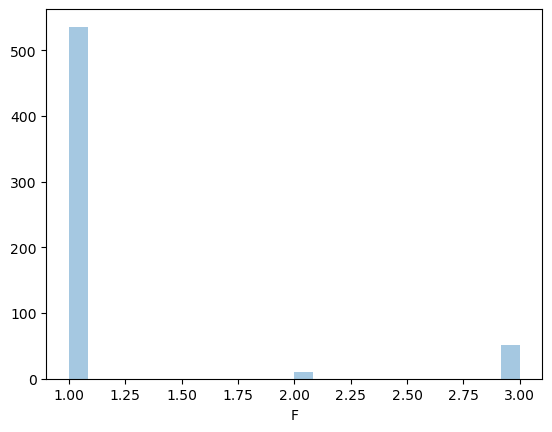

In [22]:
# Вот у этих студентов большая проблема со здачей экзаменов. Неуспешно сдают экзамены
sns.distplot(df_problem.F, kde=False)
df_problem_F = df_problem.query("F==1")
df_problem_F

C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,id_student,R,F,M,RFM_Score,RFM_Score_summ,problem
0,558914,5,1,2,512,8,problem
19,566185,5,2,2,522,9,problem
39,572382,5,2,2,522,9,problem
60,576516,5,1,2,512,8,problem
65,577245,4,1,2,412,7,problem
...,...,...,...,...,...,...,...
4937,651061,4,1,2,412,7,problem
4945,651672,4,1,2,412,7,problem
4949,652267,4,1,2,412,7,problem
4953,652619,4,1,2,412,7,problem


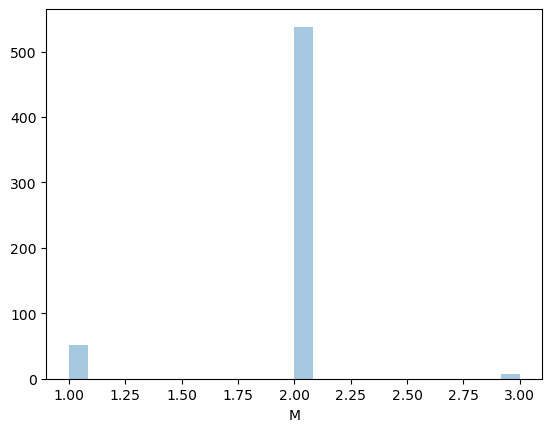

In [23]:
# Вот у этих студентов большая проблема со здачей экзаменов. Малова-то баллов набирают на экзамене.
sns.distplot(df_problem.M, kde=False)
df_problem_M = df_problem.query("M<=2")
df_problem_M